Absorption lengths are calculated for the whole energy space.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import xrayutilities as xu

In [2]:
# linspace with 1 eV
energies = np.linspace(8000, 35000, 27001)

In [3]:
germanium = xu.materials.Ge
carbon = xu.materials.C

In [4]:
absorptionGe = [germanium.absorption_length(e) for e in energies]
absorptionC = [carbon.absorption_length(e) for e in energies]

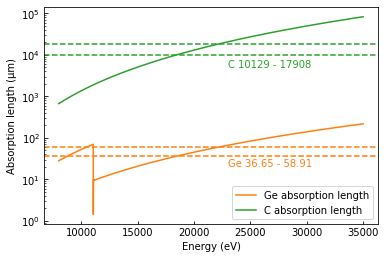

In [18]:
fig, ax = plt.subplots()

cGe = u'#ff7f0e'
cC = u'#2ca02c'

ax.tick_params(direction='in', which='both')

#ax.axvline(x=18500, linestyle='--', c='k')
#ax.axvline(x=21000, linestyle='--', c='k')


# Ge
ax.axhline(y=36.6478, linestyle='--', c=cGe)
ax.axhline(y=58.9108, linestyle='--', c=cGe)
ax.text(23000, 20, 'Ge 36.65 - 58.91', c=cGe)

# C
ax.axhline(y=10129, linestyle='--', c=cC)
ax.axhline(y=17908, linestyle='--', c=cC)
ax.text(23000, 5000, 'C 10129 - 17908', c=cC)

        
ax.plot(energies, absorptionGe, label='Ge absorption length', c=cGe)
ax.plot(energies, absorptionC, label='C absorption length', c=cC)
ax.set(xlabel='Energy (eV)',
      ylabel='Absorption length (µm)',
      yscale='log')

ax.legend()

fig.savefig('absorption_length_combined.png', dpi=600)

In [8]:
def T(thickness,
      absorption=absorptionC
     ) -> list[float]:
    """
     returns the transmission for all energies 
    """
    return [100*np.exp(-thickness/abs_l) for abs_l in absorption]

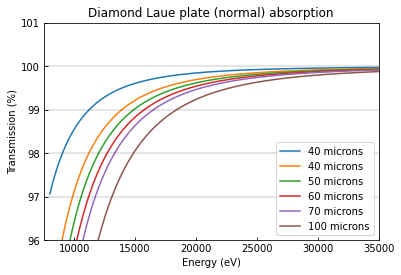

In [17]:
fig, ax = plt.subplots()

ax.plot(energies, T(20), label='40 microns')
ax.plot(energies, T(40), label='40 microns')
ax.plot(energies, T(50), label='50 microns')
ax.plot(energies, T(60), label='60 microns')
ax.plot(energies, T(70), label='70 microns')
ax.plot(energies, T(100), label='100 microns')

ax.legend()

ax.set(title = 'Diamond Laue plate (normal) absorption')

ax.tick_params(direction='in', which='both')

for y in [100, 99, 98, 97]:
    ax.axhline(y=y, linewidth=0.2, c='k')
ax.set(xlabel='Energy (eV)',
       ylabel='Transmission (%)',
       xlim=(7500,35000),
       ylim=(96,101)
      )
fig.savefig('LPabsorption.png')